<a href="https://colab.research.google.com/github/nimisha-jyothi/ML-Projects/blob/master/Telco_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [13]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [14]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [15]:
df.duplicated().sum()

0

In [16]:
df.drop('customerID',axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df:
  if df[i].dtypes=='object':
    df[i]=le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


<Axes: ylabel='MonthlyCharges'>

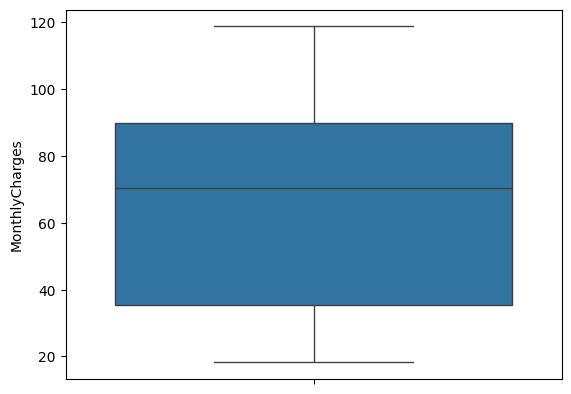

In [23]:
sns.boxplot(df['MonthlyCharges'])

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

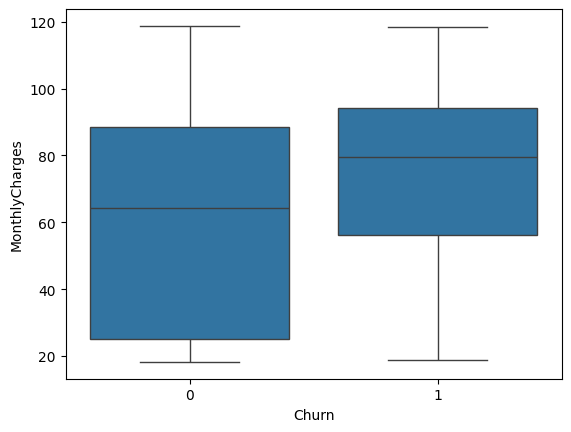

In [25]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)

<Axes: xlabel='Churn', ylabel='tenure'>

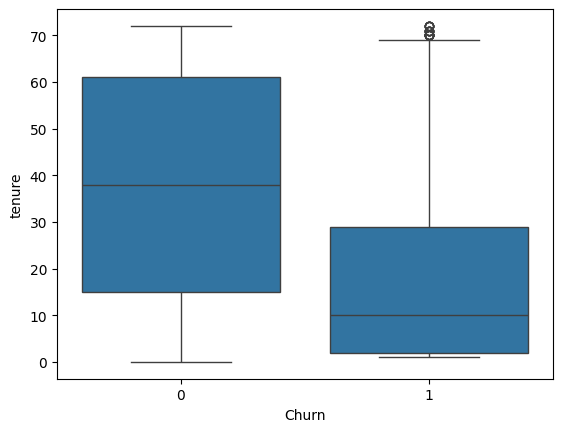

In [26]:
sns.boxplot(x='Churn',y='tenure',data=df)

In [43]:
pd.to_numeric(df['TotalCharges'],errors='coerce')
num_col=['tenure','MonthlyCharges','TotalCharges']

In [49]:
def remove_outliers(df,columns):
  for col in columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
  return df
df1=remove_outliers(df,num_col)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

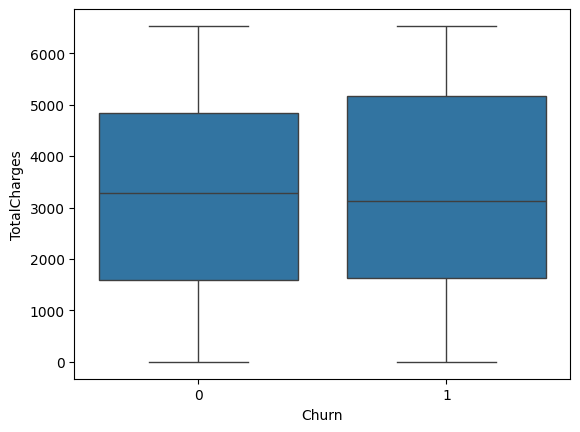

In [50]:
sns.boxplot(x='Churn',y='TotalCharges',data=df1)

<Axes: xlabel='Churn', ylabel='tenure'>

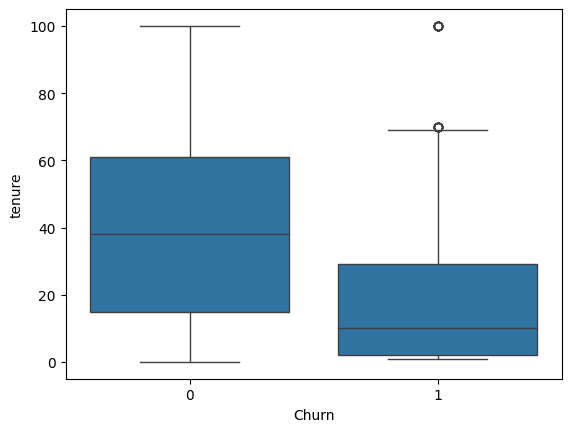

In [51]:
sns.boxplot(x='Churn',y='tenure',data=df1)

In [52]:
x=df1.drop('Churn',axis=1)
y=df1['Churn']

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,610
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,100.00,4319
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,1940
1362,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,100.00,2012
6754,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,100.00,6440
5191,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,100.00,1819
5226,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,2659
5390,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,100.00,370


In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [58]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8147622427253371
[[941  95]
 [166 207]]


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



<Axes: >

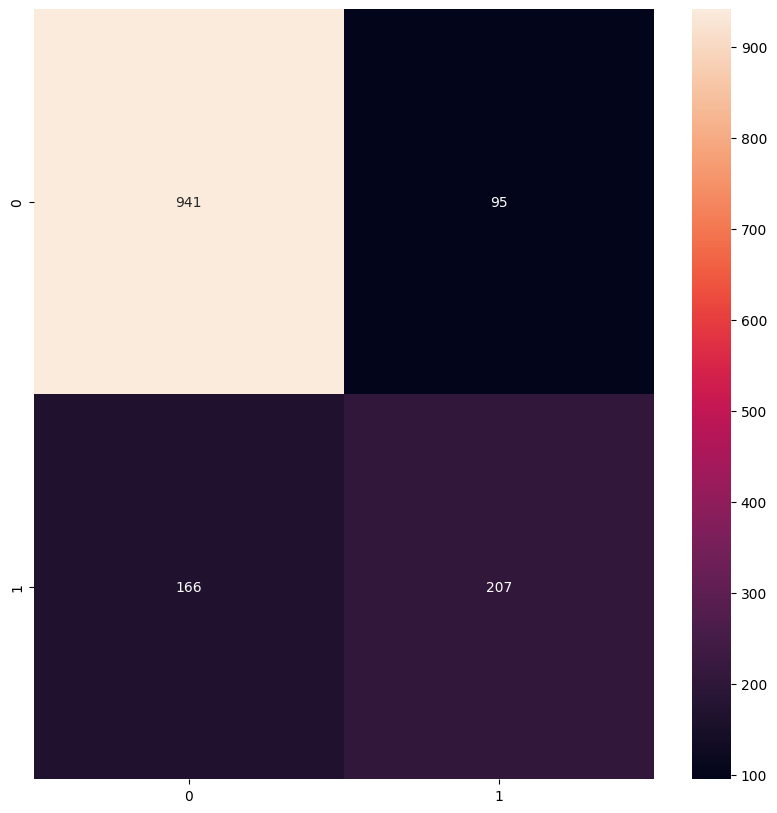

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')


In [67]:
report_dict=classification_report(y_test,y_pred,output_dict=True)
report_df=pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
0,0.850045,0.908301,0.878208,1036.000000
1,0.685430,0.554960,0.613333,373.000000
accuracy,0.814762,0.814762,0.814762,0.814762
macro avg,0.767738,0.731630,0.745771,1409.000000
weighted avg,0.806467,0.814762,0.808089,1409.000000


Text(70.72222222222221, 0.5, 'Classes')

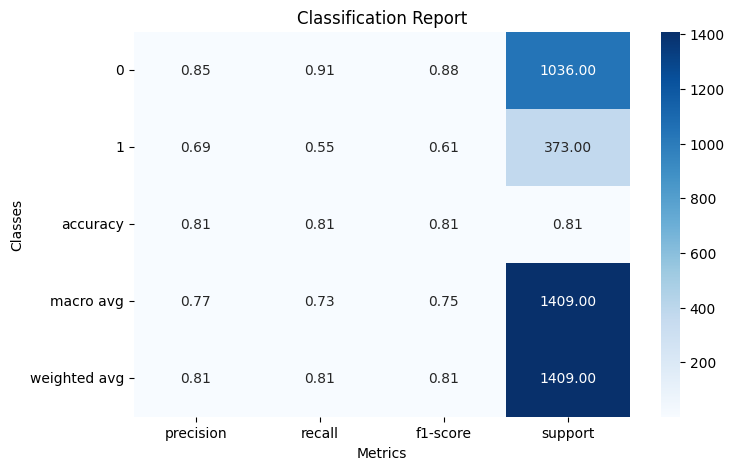

In [68]:
plt.figure(figsize=(8,5))
sns.heatmap(report_df,annot=True,fmt='.2f',cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
#